Nombre: Jessica Méndez

Materia: PLN, Visión y Ética Computacional

02 de Febrero de 2023


---



---

**Tecmilenio y la creadora del presente notebook, no guarda relación alguna con las marcas mencionadas como ejemplo. Las marcas son propiedad de sus titulares conforme a la legislación aplicable, se utilizan con fines académicos y didácticos, por lo que no existen fines de lucro, relación publicitaria o de patrocinio.

---

# Instalación de Paquetes

In [ ]:
!pip install NLTK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Bibliotecas a usar

In [ ]:
import nltk
import random
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
%matplotlib inline


***Entregable***

Reporte electrónico en Word de los requisitos solicitados en las instrucciones, incluyendo imágenes que comprueben los resultados y el archivo con extensión .ipynb con el código del programa en Python.

El trabajo práctico que se realizará utiliza programación en Python 3 y una librería de código abierto: scikit-learn, utilizada para análisis de datos. Para mayor referencia, consulta el sitio oficial de scikit-learn en internet.

## 1. Descarga el corpus “wine dataset” dentro de scikit-learn y explóralo.

El conjunto de datos contiene los resultados de análisis químico de vinos cultivados en la misma región en Italia, pero derivados de tres cultivares diferentes, consta de 13 atributos y 3 tipos de vino.





Fuente y dataset en [Toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html)

In [ ]:
wine=load_wine()
print(wine)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [ ]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [ ]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [ ]:
#Convertir a un dataframe con Pandas
df=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

#Check data with info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
# Para encontrar valores nulos, na, n/a 

(df.isnull() | df.empty | df.isna()).sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

## Análisis exploratorio de Datos

In [ ]:
#Veamos la frecuencia de la variable target.
#Convertir variable a categórica.
df.target=df.target.astype('int64').astype('category')

#Frecuencia
frecuencia=df['target'].value_counts()

frecuencia.sort_index()

0    59
1    71
2    48
Name: target, dtype: int64

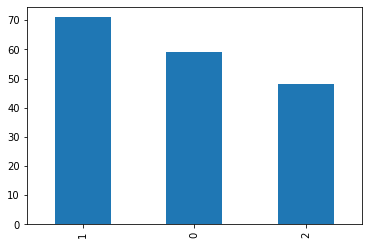

In [ ]:
#Revisión con histogramas
frecuencia.plot(kind='bar')

In [ ]:
#Resumen del conjunto de datos estadísticos básicos.
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Histogramas
Vamos a mostrar los histogramas de las variables alcohol, magnesio y color_intensity.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70bffddfa0>,
      dtype=object)

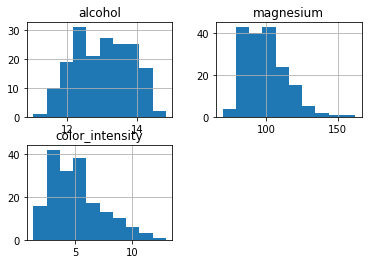

In [ ]:

df[['alcohol','magnesium','color_intensity']].hist()

## Análisis:


*   Todas las variables del conjunto de datos, excepto la variable objetivo, son  numéricas continuas.
*   No faltan valores en ninguna de las variables. 

*    De los valores estadísticos básicos podemos ver que ninguna de las variables sigue una distribución normal, ya que ninguna tiene media 0 y desviación estándar 1.
*   En los histogramas podemos observar como la variable alcohol tiene una distribución más o menos centrada, con la mayoría de las registros que tienen valores entre 12 y 14 grados, en cuanto a color_intensity y magnesio, observamos que sus distribuciones están sesgadas a la izquierda.






 

  

In [ ]:
feats_to_explore = ['alcohol', 'magnesium', 'color_intensity']

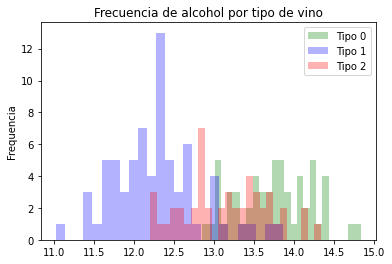

In [ ]:
# Alcohol variable histograms.
x1 = df.loc[df.target==0, 'alcohol']
x2 = df.loc[df.target==1, 'alcohol']
x3 = df.loc[df.target==2, 'alcohol']

kwargs = dict(alpha=0.3,bins=25)

plt.hist(x1, **kwargs, color='g', label='Tipo 0')
plt.hist(x2, **kwargs, color='b', label='Tipo 1')
plt.hist(x3, **kwargs, color='r', label='Tipo 2')
plt.gca().set(title='Frecuencia de alcohol por tipo de vino', ylabel='Frequencia')

plt.legend();

### 2.Separa las columnas de los datos en variables dependientes e independientes, es decir, atributos y etiquetas de clase. Utiliza el código siguiente para separar los datos en el conjunto de entrenamiento y de prueba. 




In [ ]:
X=pd.DataFrame(wine['data'])
print(X.head())

      0     1     2     3      4     5     6     7     8     9     10    11  \
0  14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

       12  
0  1065.0  
1  1050.0  
2  1185.0  
3  1480.0  
4   735.0  


In [ ]:
y = print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
X_train, X_test, y_train,y_test = train_test_split(wine.data, wine.target, test_size = 0.30, random_state=100)


### 3.Genera el modelo utilizando el conjunto de datos de entrenamiento.


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
modelo_naivebayes=GaussianNB()
modelo_naivebayes.fit(X_train,y_train)


GaussianNB()


### 4.Con el modelo construido, realiza predicciones utilizando el conjunto de datos de prueba y almacena los resultados en una variable nombrada y_pred.



In [ ]:
y_pred = modelo_naivebayes.predict(X_test)
print(y_pred)

[1 2 0 1 2 2 1 1 1 1 2 1 2 2 2 0 2 0 1 0 2 0 1 1 0 0 1 1 1 2 2 1 0 1 2 2 1
 1 2 2 0 2 2 2 0 2 2 2 0 0 0 1 0 1]


### 5.Importa el módulo metrics de scikit-learn y evalúa el modelo construido utilizando accuracy_score.


In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

1.0


In [ ]:
from sklearn.metrics import confusion_matrix
cm=np.array(confusion_matrix(y_test,y_pred))
cm

array([[14,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 21]])


### 6.Mejora los resultados de la predicción. Utiliza el apartado de supervised learning en el sitio [oficial](https://scikit-learn.org/stable/supervised_learning.html) de scikit-learn en Internet para proponer mejoras al clasificador, ya sea modificando sus parámetros o utilizando algún otro.